In [171]:
import nltk
import sklearn
import spacy
print('The nltk version is {}.'.format(nltk.__version__))
print('The scikit-learn version is {}.'.format(sklearn.__version__))
print('The scikit-learn version is {}.'.format(spacy.__version__))

The nltk version is 3.7.
The scikit-learn version is 0.24.2.
The scikit-learn version is 2.3.5.


In [1]:
import numpy as np
import pandas as pd
import re
import string
import math
import spacy
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from textwrap import wrap
from textblob import TextBlob

C:\ProgramData\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\ProgramData\Anaconda3\lib\site-packages\cupy\_environment.py:213: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
import matplotlib.pyplot as plt

In [3]:
#import matplotlib.pyplot as plt

In [4]:
import nltk

In [5]:
df = pd.read_csv("1429_1.csv")

C:\Users\Vinot\AppData\Local\Temp\ipykernel_8460\94493633.py:1: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("1429_1.csv")


In [6]:
df.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [7]:
df.dtypes

id                       object
name                     object
asins                    object
brand                    object
categories               object
keys                     object
manufacturer             object
reviews.date             object
reviews.dateAdded        object
reviews.dateSeen         object
reviews.didPurchase      object
reviews.doRecommend      object
reviews.id              float64
reviews.numHelpful      float64
reviews.rating          float64
reviews.sourceURLs       object
reviews.text             object
reviews.title            object
reviews.userCity        float64
reviews.userProvince    float64
reviews.username         object
dtype: object

In [8]:
textdata = df[['categories','name','reviews.text','reviews.rating','reviews.title']]
textdata.shape

(34660, 5)

In [9]:
textdata['reviews.rating'].value_counts()

5.0    23775
4.0     8541
3.0     1499
1.0      410
2.0      402
Name: reviews.rating, dtype: int64

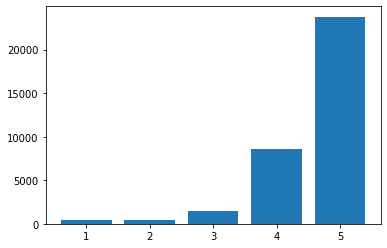

In [10]:
counts = textdata['reviews.rating'].value_counts()
plt.bar(counts.index, counts.values)
plt.show()

In [11]:
textdata = textdata.drop_duplicates()

In [12]:
textdata.shape # there are no duplicates 

(34660, 5)

In [13]:
textdata = textdata.dropna()

In [14]:
textdata.shape

(27864, 5)

In [15]:
textdata['reviews.rating'].value_counts()

5.0    18690
4.0     7220
3.0     1289
2.0      339
1.0      326
Name: reviews.rating, dtype: int64

In [16]:
textdata.isna().sum()

categories        0
name              0
reviews.text      0
reviews.rating    0
reviews.title     0
dtype: int64

Text(0, 0.5, 'Count')

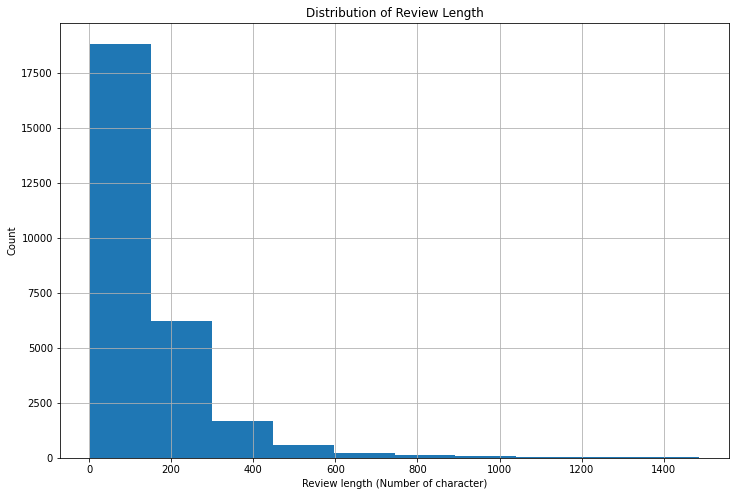

In [17]:
# Plot distribution of review length
review_length = textdata["reviews.text"].dropna().map(lambda x: len(x))
plt.figure(figsize=(12,8))
review_length.loc[review_length < 1500].hist()
plt.title("Distribution of Review Length")
plt.xlabel('Review length (Number of character)')
plt.ylabel('Count')

Text(0.5, 1.0, 'Number of Reviews for Top 50 Products')

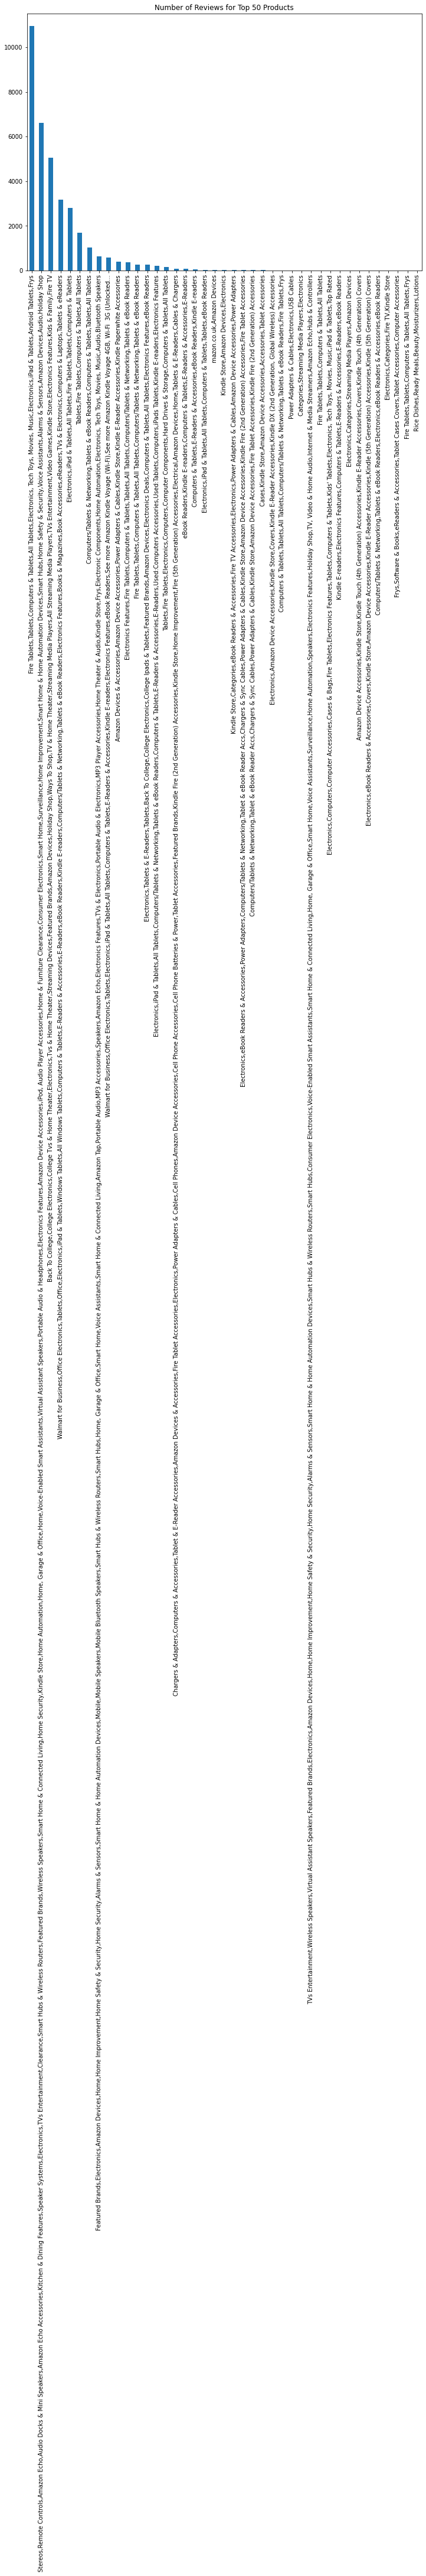

In [18]:
# Plot number of reviews for top 50 products
products = df["categories"].value_counts()
plt.figure(figsize=(12,8))
products[:50].plot(kind='bar')
plt.title("Number of Reviews for Top 50 Products")

Text(0.5, 1.0, 'Number of Reviews for Top 50 Products')

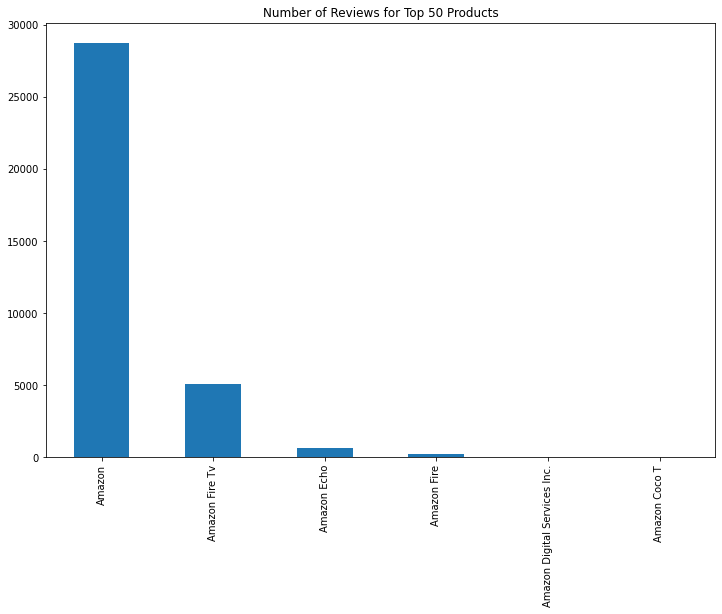

In [19]:
# Plot number of reviews for top 50 products
products = df["brand"].value_counts()
plt.figure(figsize=(12,8))
products[:50].plot(kind='bar')
plt.title("Number of Reviews for Top 50 Products")

Text(0.5, 1.0, 'Number of Reviews for Top 20 Products')

) missing from current font.\site-packages\IPython\core\events.py:89: UserWarning: Glyph 13 (
  func(*args, **kwargs)
) missing from current font.\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


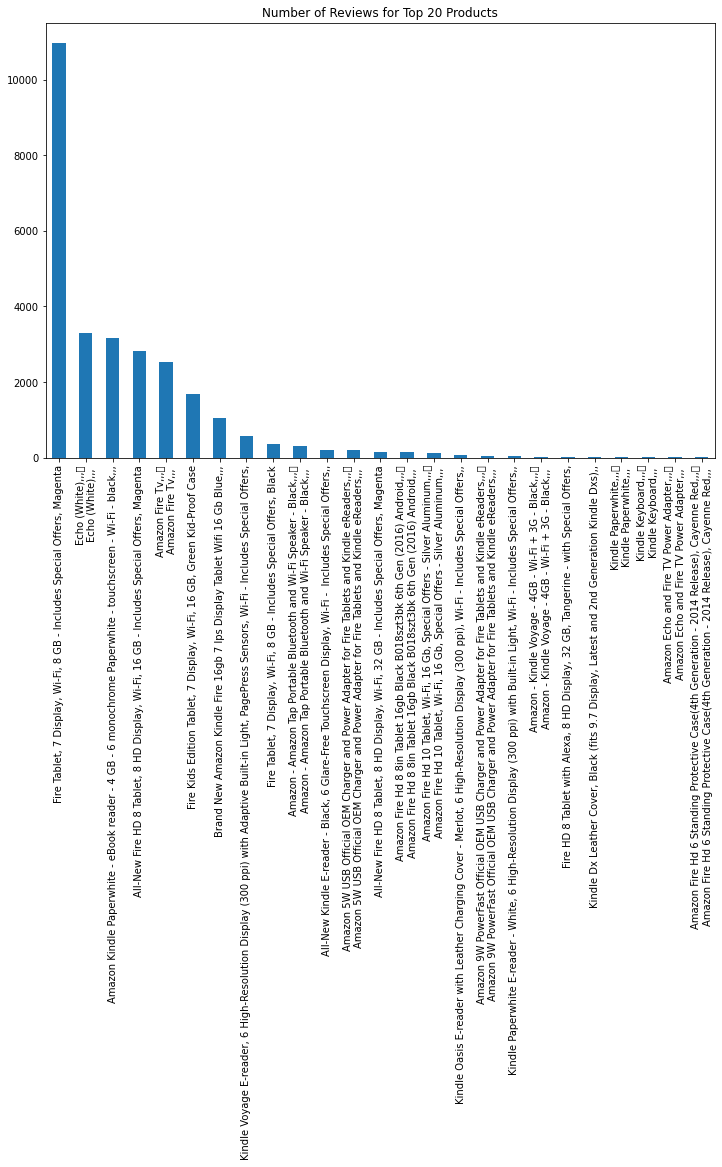

In [20]:
# Plot number of reviews for top 50 products
products = df["name"].value_counts()
plt.figure(figsize=(12,8))
products[:25].plot(kind='bar')
plt.title("Number of Reviews for Top 20 Products")

In [21]:
#text blob:

In [22]:
#python -m textblob.download_corpora

In [23]:
# Create TextBlob object
text = TextBlob("I want to be remembered not only as an entertainer but as a person who cared a lot, and I gave the best that I could. I tried to be the best role model that I possibly could.")

In [24]:
# Print the tokens
print(text.words)

['I', 'want', 'to', 'be', 'remembered', 'not', 'only', 'as', 'an', 'entertainer', 'but', 'as', 'a', 'person', 'who', 'cared', 'a', 'lot', 'and', 'I', 'gave', 'the', 'best', 'that', 'I', 'could', 'I', 'tried', 'to', 'be', 'the', 'best', 'role', 'model', 'that', 'I', 'possibly', 'could']


In [25]:
# make a function to clean reviews
def cleanTxt(text):
    text= re.sub('@[A-Za-z0-9]+','',text ) #removing mentions
    text= re.sub("#",'',text) #removing #
    text= re.sub('RT[\s]+','',text)
    text = re.sub(r'[^\w\s]','',text) # removing punctuations
    text= re.sub('https?:\/\/\S+','',text) #removing links
    return text

In [26]:

textdata['clean_reviews']= textdata['reviews.text'].apply(cleanTxt)

In [27]:
#textdata['clean_reviews']= textdata['clean_reviews'].apply(lambda x: " ".join([TextBlob(i).correct() for i in x['text'].split()]))

In [28]:
textdata.head()

,categories,name,reviews.text,reviews.rating,reviews.title,clean_reviews
0,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",This product so far has not disappointed. My c...,5.0,Kindle,This product so far has not disappointed My ch...
1,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",great for beginner or experienced person. Boug...,5.0,very fast,great for beginner or experienced person Bough...
2,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Inexpensive tablet for him to use and learn on...,5.0,Beginner tablet for our 9 year old son.,Inexpensive tablet for him to use and learn on...
3,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I've had my Fire HD 8 two weeks now and I love...,4.0,Good!!!,Ive had my Fire HD 8 two weeks now and I love ...
4,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I bought this for my grand daughter when she c...,5.0,Fantastic Tablet for kids,I bought this for my grand daughter when she c...


In [29]:
# create a function to get the subjectivity of all the reviews
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# create a function to get the Polarity of all the reviews
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# create 2 columns 'Subjectivity' and 'Polarity'
textdata['Subjectivity']= textdata['clean_reviews'].apply(getSubjectivity)
textdata['Polarity']= textdata['clean_reviews'].apply(getPolarity)

In [30]:
textdata.head()

,categories,name,reviews.text,reviews.rating,reviews.title,clean_reviews,Subjectivity,Polarity
0,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",This product so far has not disappointed. My c...,5.0,Kindle,This product so far has not disappointed My ch...,0.783333,0.325000
1,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",great for beginner or experienced person. Boug...,5.0,very fast,great for beginner or experienced person Bough...,0.825000,0.800000
2,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Inexpensive tablet for him to use and learn on...,5.0,Beginner tablet for our 9 year old son.,Inexpensive tablet for him to use and learn on...,0.700000,0.600000
3,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I've had my Fire HD 8 two weeks now and I love...,4.0,Good!!!,Ive had my Fire HD 8 two weeks now and I love ...,0.731250,0.374583
4,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I bought this for my grand daughter when she c...,5.0,Fantastic Tablet for kids,I bought this for my grand daughter when she c...,0.616226,0.368056


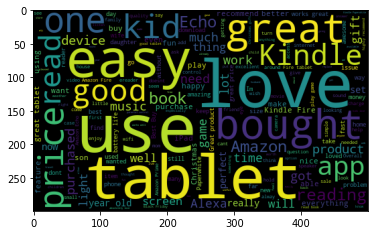

In [31]:
# Word Cloud Visualization
allwords= ' '.join([i for i in textdata['clean_reviews']])
Cloud= WordCloud(width=500,height=300,random_state=0,max_font_size=100).generate(allwords)

plt.imshow(Cloud)
plt.show()

In [32]:
# Create a function to compute negative neutral and positive

def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'

textdata['Analysis']= textdata['Polarity'].apply(getAnalysis)
textdata

,categories,name,reviews.text,reviews.rating,reviews.title,clean_reviews,Subjectivity,Polarity,Analysis
0,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",This product so far has not disappointed. My c...,5.0,Kindle,This product so far has not disappointed My ch...,0.783333,0.325000,Positive
1,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",great for beginner or experienced person. Boug...,5.0,very fast,great for beginner or experienced person Bough...,0.825000,0.800000,Positive
2,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Inexpensive tablet for him to use and learn on...,5.0,Beginner tablet for our 9 year old son.,Inexpensive tablet for him to use and learn on...,0.700000,0.600000,Positive
3,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I've had my Fire HD 8 two weeks now and I love...,4.0,Good!!!,Ive had my Fire HD 8 two weeks now and I love ...,0.731250,0.374583,Positive
4,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I bought this for my grand daughter when she c...,5.0,Fantastic Tablet for kids,I bought this for my grand daughter when she c...,0.616226,0.368056,Positive
...,...,...,...,...,...,...,...,...,...
27895,"Stereos,Remote Controls,Amazon Echo,Audio Dock...",New Amazon Kindle Fire Hd 9w Powerfast Adapter...,This is my new favorite device. While not perf...,5.0,My new favorite product,This is my new favorite device While not perfe...,0.455682,0.249026,Positive
27896,"Stereos,Remote Controls,Amazon Echo,Audio Dock...",New Amazon Kindle Fire Hd 9w Powerfast Adapter...,I got this to basically experiment with. Strai...,5.0,Lots of potential!!!,I got this to basically experiment with Straig...,0.568750,0.248437,Positive
27897,"Stereos,Remote Controls,Amazon Echo,Audio Dock...",New Amazon Kindle Fire Hd 9w Powerfast Adapter...,Good product that does the basics. Too bad you...,4.0,Good First Generation Product,Good product that does the basics Too bad you ...,0.623452,0.251429,Positive
27898,"Stereos,Remote Controls,Amazon Echo,Audio Dock...",New Amazon Kindle Fire Hd 9w Powerfast Adapter...,This is great for a connected home. People who...,3.0,"Great for a ""connected home""",This is great for a connected home People who ...,0.725000,0.150000,Positive


In [33]:
textdata['Analysis'].value_counts()

Positive    25009
Neutral      1645
Negative     1210
Name: Analysis, dtype: int64

In [34]:
model = textdata[['clean_reviews', 'Analysis']]

In [35]:
model

,clean_reviews,Analysis
0,This product so far has not disappointed My ch...,Positive
1,great for beginner or experienced person Bough...,Positive
2,Inexpensive tablet for him to use and learn on...,Positive
3,Ive had my Fire HD 8 two weeks now and I love ...,Positive
4,I bought this for my grand daughter when she c...,Positive
...,...,...
27895,This is my new favorite device While not perfe...,Positive
27896,I got this to basically experiment with Straig...,Positive
27897,Good product that does the basics Too bad you ...,Positive
27898,This is great for a connected home People who ...,Positive


In [36]:
model['pos_neg'] = pd.factorize(model['Analysis'])[0] + 1

C:\Users\Vinot\AppData\Local\Temp\ipykernel_8460\622417560.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model['pos_neg'] = pd.factorize(model['Analysis'])[0] + 1


In [37]:
model['pos_neg'].value_counts()

1    25009
3     1645
2     1210
Name: pos_neg, dtype: int64

In [38]:
# 1= positive , 2= negative, 3 = neutral 
from sklearn.model_selection import train_test_split

In [39]:
x_train, x_test, y_train, y_test = train_test_split(model.clean_reviews, model.pos_neg, random_state=0,test_size=0.2)

In [40]:
print("x_train shape: {}".format(x_train.shape), end='\n')
print("y_train shape: {}".format(y_train.shape), end='\n\n')
print("x_test shape: {}".format(x_test.shape), end='\n')
print("y_test shape: {}".format(y_test.shape), end='\n\n')

x_train shape: (22291,)
y_train shape: (22291,)

x_test shape: (5573,)
y_test shape: (5573,)



In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

In [42]:
import itertools

In [43]:
# Vectorize X_train
vectorizer = TfidfVectorizer(min_df=5).fit(x_train)
X_train = vectorizer.transform(x_train)
print("X_train:\n{}".format(repr(X_train)))

X_train:
<22291x3652 sparse matrix of type '<class 'numpy.float64'>'
	with 507485 stored elements in Compressed Sparse Row format>


In [44]:
feature_names = vectorizer.get_feature_names()
print("Number of features: {}".format(len(feature_names)))

Number of features: 3652


In [45]:
scores = cross_val_score(LogisticRegression(), X_train, y_train, cv=5)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
print("Mean cross-validation accuracy: {:.3f}".format(np.mean(scores)))

Mean cross-validation accuracy: 0.923


In [47]:
logreg = LogisticRegression(C=0.1).fit(X_train, y_train)

X_test = vectorizer.transform(x_test)

log_y_pred = logreg.predict(X_test)

In [48]:
logreg_score = accuracy_score(y_test, log_y_pred)
print("Accuracy:   {:.3f}".format(logreg_score))

Accuracy:   0.902


In [49]:
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test))) 

Training set score: 0.899
Test set score: 0.902


In [50]:
log_cfm = confusion_matrix(y_test, log_y_pred)
print("Confusion matrix:")
print(log_cfm, end='\n\n')
print('-'*15)
print(np.array([['TN', 'FP'],[ 'FN' , 'TP']]))

Confusion matrix:
[[5017    0    0]
 [ 234    0    0]
 [ 314    0    8]]

---------------
[['TN' 'FP']
 ['FN' 'TP']]


In [52]:
from sklearn.metrics import precision_recall_fscore_support as score

predicted = log_y_pred
y_test 

precision, recall, fscore, support = score(y_test, predicted,average='weighted')

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: 0.8693635354259861
recall: 0.901668760093307
fscore: 0.8564151263953885
support: None


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


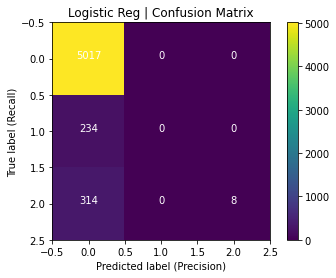

In [53]:

plt.imshow(log_cfm, interpolation='nearest')

for i, j in itertools.product(range(log_cfm.shape[0]), range(log_cfm.shape[1])):
    plt.text(j, i, log_cfm[i, j],
             horizontalalignment="center",
             color="white")

plt.ylabel('True label (Recall)')
plt.xlabel('Predicted label (Precision)')
plt.title('Logistic Reg | Confusion Matrix')
plt.colorbar();

In [54]:
log_f1 = f1_score(y_test, log_y_pred,pos_label='positive',average='micro')
print("Logistic Reg - F1 score: {:.3f}".format(log_f1))

Logistic Reg - F1 score: 0.902


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [55]:
#GridSearchCV on Training data to Increase Performance

In [56]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [57]:

print("Best cross-validation score: {:.3f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

Best cross-validation score: 0.951
Best parameters:  {'C': 10}


In [58]:
# Apply Best Parameters from GridSearchCV on  test data 

In [59]:
print("{:.3f}".format(grid.score(X_test, y_test)))


0.955


In [60]:
grid_log_f1 = f1_score(y_test, log_y_pred,pos_label='positive',average='micro')
print("Grid Logistic Reg - F1 score: {:.3f}".format(grid_log_f1))

Grid Logistic Reg - F1 score: 0.902


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [61]:
cnf_matrix = confusion_matrix(y_test, log_y_pred)

In [62]:
print("Confusion matrix:")
print(cnf_matrix, end='\n\n')
print('-'*15)
print(np.array([['TN', 'FP'],[ 'FN' , 'TP']]))

Confusion matrix:
[[5017    0    0]
 [ 234    0    0]
 [ 314    0    8]]

---------------
[['TN' 'FP']
 ['FN' 'TP']]


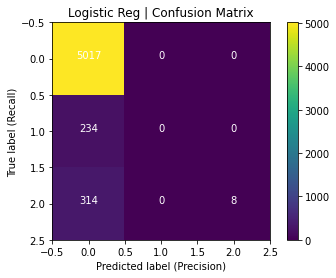

In [63]:
plt.imshow(cnf_matrix, interpolation='nearest')

for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
             horizontalalignment="center",
             color="white")

plt.ylabel('True label (Recall)')
plt.xlabel('Predicted label (Precision)')
plt.title('Logistic Reg | Confusion Matrix')
plt.colorbar();

In [78]:
mnb = MultinomialNB(alpha=.01)
mnb.fit(X_train, y_train)

MultinomialNB(alpha=0.01)

In [79]:
mnb_y_pred = mnb.predict(X_test)

In [80]:
mnb_score = accuracy_score(y_test, mnb_y_pred)
print("Accuracy:   {:.3f}".format(mnb_score))

Accuracy:   0.902


In [81]:
print("Training set score: {:.3f}".format(mnb.score(X_train, y_train)))
print("Test set score: {:.3f}".format(mnb.score(X_test, y_test)))

Training set score: 0.904
Test set score: 0.902


In [82]:

mnb_cfm = confusion_matrix(y_test, mnb_y_pred)
print("Confusion matrix:")
print(mnb_cfm, end='\n\n')
print('-'*15)
print(np.array([['TN', 'FP'],[ 'FN' , 'TP']]))

Confusion matrix:
[[5017    0    0]
 [ 231    3    0]
 [ 317    0    5]]

---------------
[['TN' 'FP']
 ['FN' 'TP']]


In [83]:
from sklearn.metrics import precision_recall_fscore_support as score

predicted = mnb_y_pred 
y_test 

precision, recall, fscore, support = score(y_test, predicted,average='weighted')

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: 0.9113516926124208
recall: 0.901668760093307
fscore: 0.856443661156202
support: None


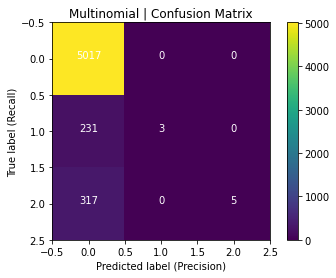

In [84]:
plt.imshow(mnb_cfm, interpolation='nearest')

for i, j in itertools.product(range(mnb_cfm.shape[0]), range(mnb_cfm.shape[1])):
    plt.text(j, i, mnb_cfm[i, j],
             horizontalalignment="center",
             color="white")

plt.ylabel('True label (Recall)')
plt.xlabel('Predicted label (Precision)')
plt.title('Multinomial | Confusion Matrix')
plt.colorbar();

In [85]:

mnb_f1 = f1_score(y_test, mnb_y_pred,pos_label='positive',average='micro')
print("Multinomial NB - F1 score: {:.3f}".format(mnb_f1))

Multinomial NB - F1 score: 0.902


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:

clf = RandomForestClassifier(max_depth=5, random_state=0)
logreg = clf.fit(X_train, y_train)

X_test = vectorizer.transform(x_test)

log_y_pred = logreg.predict(X_test)

In [88]:
logreg_score = accuracy_score(y_test, log_y_pred)
print("Accuracy:   {:.3f}".format(logreg_score))

Accuracy:   0.900


In [89]:
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.897
Test set score: 0.900


In [90]:
log_cfm = confusion_matrix(y_test, log_y_pred)
print("Confusion matrix:")
print(log_cfm, end='\n\n')
print('-'*15)
print(np.array([['TN', 'FP'],[ 'FN' , 'TP']]))

Confusion matrix:
[[5017    0    0]
 [ 234    0    0]
 [ 322    0    0]]

---------------
[['TN' 'FP']
 ['FN' 'TP']]


In [91]:
from sklearn.metrics import precision_recall_fscore_support as score

predicted = mnb_y_pred 
y_test 

precision, recall, fscore, support = score(y_test, predicted,average='weighted')

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: 0.9113516926124208
recall: 0.901668760093307
fscore: 0.856443661156202
support: None


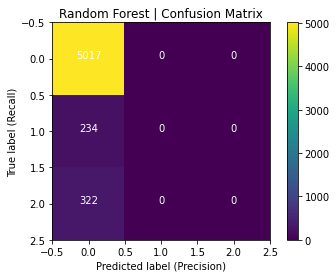

In [92]:

plt.imshow(log_cfm, interpolation='nearest')

for i, j in itertools.product(range(log_cfm.shape[0]), range(log_cfm.shape[1])):
    plt.text(j, i, log_cfm[i, j],
             horizontalalignment="center",
             color="white")

plt.ylabel('True label (Recall)')
plt.xlabel('Predicted label (Precision)')
plt.title('Random Forest | Confusion Matrix')
plt.colorbar();

In [93]:
from sklearn.ensemble import GradientBoostingClassifier

In [94]:

logreg = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)

X_test = vectorizer.transform(x_test)

log_y_pred = logreg.predict(X_test)

In [95]:
logreg_score = accuracy_score(y_test, log_y_pred)
print("Accuracy:   {:.3f}".format(logreg_score))

Accuracy:   0.902


In [96]:
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.910
Test set score: 0.902


In [97]:
log_cfm = confusion_matrix(y_test, log_y_pred)
print("Confusion matrix:")
print(log_cfm, end='\n\n')
print('-'*15)
print(np.array([['TN', 'FP'],[ 'FN' , 'TP']]))

Confusion matrix:
[[4965   14   38]
 [ 215   10    9]
 [ 270    0   52]]

---------------
[['TN' 'FP']
 ['FN' 'TP']]


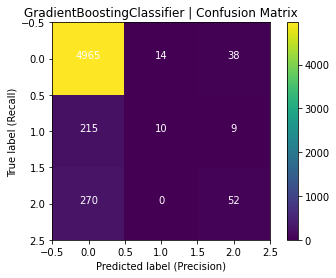

In [98]:

plt.imshow(log_cfm, interpolation='nearest')

for i, j in itertools.product(range(log_cfm.shape[0]), range(log_cfm.shape[1])):
    plt.text(j, i, log_cfm[i, j],
             horizontalalignment="center",
             color="white")

plt.ylabel('True label (Recall)')
plt.xlabel('Predicted label (Precision)')
plt.title('GradientBoostingClassifier | Confusion Matrix')
plt.colorbar();

In [99]:
log_f1 = f1_score(y_test, log_y_pred,pos_label='positive',average='micro')
print("GradientBoostingClassifier- F1 score: {:.3f}".format(log_f1))

GradientBoostingClassifier- F1 score: 0.902


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [107]:
import xgboost as xgb

In [108]:
xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=42)

In [109]:
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\cupy\_environment.py:213: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:20:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[4964   13   40]
 [ 126   83   25]
 [  63    1  258]]


In [110]:
XG_score = accuracy_score(y_test, y_pred)
print("Accuracy:   {:.3f}".format(logreg_score))

Accuracy:   0.902


In [111]:
print("Training set score: {:.3f}".format(xgb_model.score(X_train, y_train)))
print("Test set score: {:.3f}".format(xgb_model.score(X_test, y_test)))

Training set score: 0.981
Test set score: 0.952


C:\ProgramData\Anaconda3\lib\site-packages\cupy\_environment.py:213: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\cupy\_environment.py:213: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(


In [112]:
XG_score = confusion_matrix(y_test, y_pred)

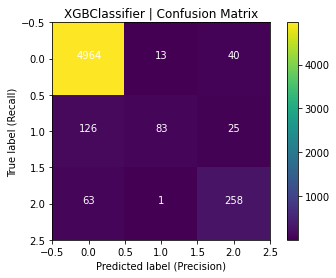

In [113]:
plt.imshow(XG_score, interpolation='nearest')

for i, j in itertools.product(range(XG_score.shape[0]), range(XG_score.shape[1])):
    plt.text(j, i, XG_score[i, j],
             horizontalalignment="center",
             color="white")

plt.ylabel('True label (Recall)')
plt.xlabel('Predicted label (Precision)')
plt.title('XGBClassifier | Confusion Matrix')
plt.colorbar();

In [114]:
from sklearn.metrics import precision_recall_fscore_support as score

predicted = y_pred 
y_test 

precision, recall, fscore, support = score(y_test, predicted,average='weighted')

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: 0.9492941332764031
recall: 0.9519109994616903
fscore: 0.9460921526554735
support: None


In [115]:
model=MultinomialNB()
param={'alpha': [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]}

In [116]:
clf=GridSearchCV(model,param,scoring='roc_auc',cv=10,return_train_score=True)